# What proportion of TV shows on TMBD are classified as "Drama"?

In [8]:
import requests

API_KEY = "3f1fc491ec7a8cc350afcf3274618c7b"
BASE_URL = "https://api.themoviedb.org/3"

def get_tv_show_details(tv_id):
    url = f"{BASE_URL}/tv/{tv_id}"
    params = {"api_key": API_KEY, "language": "en-US"}
    response = requests.get(url, params=params)
    response.raise_for_status()
    return response.json()

def get_random_tv_shows(n=10):
    url = f"{BASE_URL}/tv/popular"
    params = {"api_key": API_KEY, "language": "en-US", "page": 1}
    response = requests.get(url, params=params)
    response.raise_for_status()
    data = response.json()
    shows = data["results"]
    return shows[:n]

# Get 10 random TV shows
shows = get_random_tv_shows()

count_drama = 0

print("Sampled TV Shows and their Genres:")
print("-" * 40)

for show in shows:
    details = get_tv_show_details(show["id"])
    genres = [genre["name"] for genre in details.get("genres", [])]
    is_drama = "Drama" in genres
    if is_drama:
        count_drama += 1
    print(f"Title: {show['name']}")
    print(f"Genres: {', '.join(genres)}")
    print(f"Is Drama? {'Yes' if is_drama else 'No'}")
    print("-" * 40)

# Calculate proportion of Drama shows
p_hat = count_drama / len(shows)
print(f"Proportion of Drama TV shows in the sample: {p_hat:.2f}")


Sampled TV Shows and their Genres:
----------------------------------------
Title: IT: Welcome to Derry
Genres: Drama, Mystery
Is Drama? Yes
----------------------------------------
Title: Stranger Things
Genres: Sci-Fi & Fantasy, Mystery, Action & Adventure
Is Drama? No
----------------------------------------
Title: The Witcher
Genres: Sci-Fi & Fantasy, Drama, Action & Adventure
Is Drama? Yes
----------------------------------------
Title: Pluribus
Genres: Drama, Sci-Fi & Fantasy
Is Drama? Yes
----------------------------------------
Title: Law & Order: Special Victims Unit
Genres: Crime, Drama, Mystery
Is Drama? Yes
----------------------------------------
Title: Grey's Anatomy
Genres: Drama
Is Drama? Yes
----------------------------------------
Title: NCIS
Genres: Crime, Drama, Action & Adventure
Is Drama? Yes
----------------------------------------
Title: The Simpsons
Genres: Family, Animation, Comedy
Is Drama? No
----------------------------------------
Title: Tulsa King
Genres:

   sample  p_hat
0       1    0.6
1       2    0.5
2       3    0.6
3       4    0.8
4       5    0.9


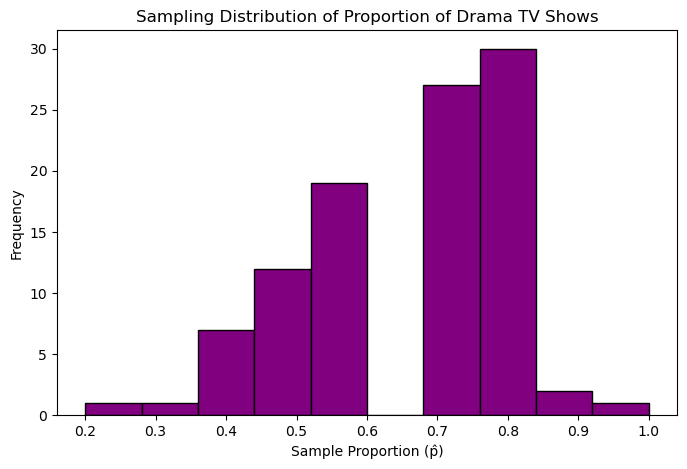


Mean of p̂: 0.664
Standard deviation of p̂: 0.144


In [2]:
import requests
import pandas as pd
import random
import time
import matplotlib.pyplot as plt

# --- 1. TMDB API setup ---
API_KEY = "3f1fc491ec7a8cc350afcf3274618c7b"
BASE_URL = "https://api.themoviedb.org/3"

# --- 2. Helper functions ---
def get_popular_tv(page=1):
    """Return a list of TV shows from TMDB popular endpoint."""
    url = f"{BASE_URL}/tv/popular"
    params = {"api_key": API_KEY, "language": "en-US", "page": page}
    response = requests.get(url, params=params)
    response.raise_for_status()
    return response.json().get("results", [])

def get_tv_details(tv_id):
    """Get detailed info (to extract genres)."""
    url = f"{BASE_URL}/tv/{tv_id}"
    params = {"api_key": API_KEY, "language": "en-US"}
    response = requests.get(url, params=params)
    response.raise_for_status()
    return response.json()

# --- 3. Build a large pool of shows ---
shows_pool = []
for page in range(1, 6):  # first 5 pages (~100 shows)
    shows_pool.extend(get_popular_tv(page))
    time.sleep(0.2)  # avoid hitting rate limits

# --- 4. Simulation: 100 samples of 10 shows each ---
sample_results = []

for i in range(100):  # 100 samples
    sample = random.sample(shows_pool, 10)
    count_drama = 0
    
    for show in sample:
        details = get_tv_details(show["id"])
        genres = [g["name"] for g in details.get("genres", [])]
        if "Drama" in genres:
            count_drama += 1
        time.sleep(0.2)  # be polite with API calls

    # Proportion of Drama in this sample
    p_hat = count_drama / 10
    sample_results.append({"sample": i + 1, "p_hat": p_hat})

# --- 5. Create DataFrame ---
df_samples = pd.DataFrame(sample_results)

# --- 6. Print first few results ---
print(df_samples.head())

# --- 7. Plot sampling distribution as a histogram ---
plt.figure(figsize=(8, 5))
plt.hist(df_samples["p_hat"], bins=10, color="purple", edgecolor="black")
plt.title("Sampling Distribution of Proportion of Drama TV Shows")
plt.xlabel("Sample Proportion (p̂)")
plt.ylabel("Frequency")
plt.show()



# --- 8. Optional: Summary statistics ---
print("\nMean of p̂:", round(df_samples['p_hat'].mean(), 3))
print("Standard deviation of p̂:", round(df_samples['p_hat'].std(), 3))


In [3]:
# --- 8. Empirical summary statistics ---
empirical_mean = df_samples["p_hat"].mean()
empirical_std = df_samples["p_hat"].std()

print(f"Empirical mean of sampling distribution: {empirical_mean:.3f}")
print(f"Empirical standard deviation of sampling distribution: {empirical_std:.3f}")


Empirical mean of sampling distribution: 0.664
Empirical standard deviation of sampling distribution: 0.144


In [6]:
# --- Compute population proportion (theoretical mean) ---
drama_count = 0
for show in shows_pool:
    details = get_tv_details(show["id"])
    genres = [g["name"] for g in details.get("genres", [])]
    if "Drama" in genres:
        drama_count += 1

p = drama_count / len(shows_pool)  # population proportion of Drama
print(f"Theoretical mean (μ_p̂) = {p:.3f}")

n = 10  # sample size
theoretical_std = (p * (1 - p) / n) ** 0.5
print(f"Theoretical standard deviation (σ_p̂) = {theoretical_std:.3f}")


Theoretical mean (μ_p̂) = 0.650
Theoretical standard deviation (σ_p̂) = 0.151
